## TASK 2

### Import Packages

In [719]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random

## Get Random Image from both folders (Y2B_24 and Y2B_23)

### To get an Image run one of the cells below!

#### If you want to get a random image from Y2B_24 folder run the cell below.

In [720]:
# Define the folder path of the images
folder_path = 'Y2B_24/images'

# Get all image file paths in the folder
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]

# Select a random image
random_image_file = random.choice(image_files)
image_path = os.path.join(folder_path, random_image_file)

#### If you want to get a random image from Y2B_23 folder run the cell below.

In [721]:
# Define the folder path of the images
folder_path = 'Y2B_23/images/train'  

# Get all image file paths in the folder
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]

# Select a random image
random_image_file = random.choice(image_files)
image_path = os.path.join(folder_path, random_image_file)

## Read the Image and Plot it

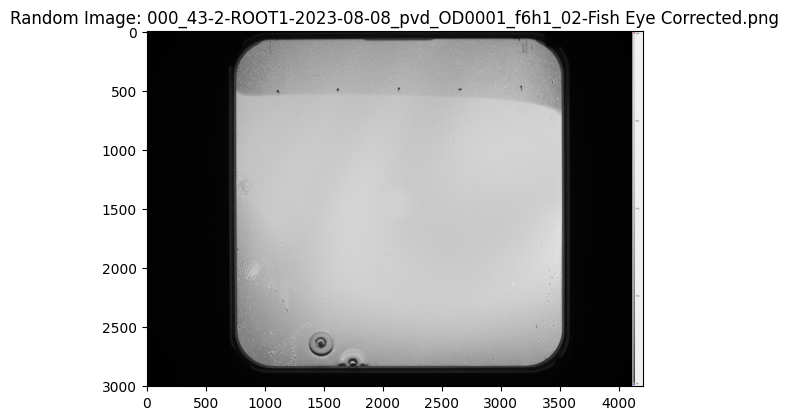

In [722]:
# Read the random image
image = cv2.imread(image_path)
# Convert the image from BGR (OpenCV default) to RGB (for correct color representation in Matplotlib)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image, cmap = 'grey')
# Display the random image
plt.title(f"Random Image: {random_image_file}")
plt.show()

### Convert Image to Greyscale
The loaded image is converted to grayscale to simplify further processing tasks.

In [723]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

### Thresholding  
Thresholding is applied to create a binary mask for contour detection.

In [724]:
# Threshold the image to create a binary mask
_, binary = cv2.threshold(gray, 65, 255, cv2.THRESH_BINARY)

### Contour Detection and Crop the Image  
Contours are detected from the binary mask, and the largest contour is assumed to be the Petri dish.  
The detected region is cropped to ensure the output image is square.

In [725]:

# Find contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the largest contour (assuming it is the petri dish)
largest_contour = max(contours, key=cv2.contourArea)

# Get the bounding box of the largest contour
x, y, w, h = cv2.boundingRect(largest_contour)

# Determine the size of the square
side_length = max(w, h)

# Calculate the center of the bounding box
center_x = x + w // 2
center_y = y + h // 2

# Calculate the coordinates for the square crop
new_x = max(0, center_x - side_length // 2)
new_y = max(0, center_y - side_length // 2)
new_x_end = min(image.shape[1], center_x + side_length // 2)
new_y_end = min(image.shape[0], center_y + side_length // 2)

# Crop the image to the square
cropped_image = image[new_y:new_y_end, new_x:new_x_end]

### Plot the Cropped Image

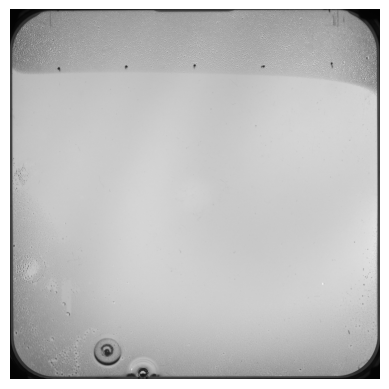

In [726]:
# Show the cropped image
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Check whether the Cropped Image is Square

If the height and width of the image are equal it is square

In [712]:
height, width, channels = cropped_image.shape
print(f'{height} : {width} : {channels}')

2746 : 2746 : 3
